## Computing the symbolic definite integral

In [1]:
import sympy as symp
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = symp.symbols('x')
expr = x**3 * symp.sin(4*x)
res = symp.integrate(expr, (x, 1, 7))
ans = res.evalf()
res.evalf()

84.4163716059116

used class notes in order to take the integral of the function and got 84.4 as my answer.

## Implement monte carlo integrator

In [3]:
def mcintegrate(a,b,n,f):
    np.random.seed(1)
    sum = 0
    c = b-a
    for i in range(1, n+1):
        r = np.random.rand()*(b-a)+a
        sum += f(r)
    return (c/i)*sum

In [4]:
n=100000
f=symp.lambdify(x,expr)
err_list = []
for i in range(1000, n+1, 1000):
    err = np.abs(ans - mcintegrate(1, 7, i, f))
    err_list.append(err)


With these functions I defined mcintegrate in the top cell. The bottom cell I defined the 4 loop that is hidden within mcintegrate so that it could properly plot the function.

The mcintegrate function returns the approximate numerical integration for the equation I defined above. The Monte Carlo method is a different approach to doing the basic integral method but contains a loop because of the summation. I defined the mcintegrate to run from 1 to 100,000 and used the random number generator to change my bounds on the function. Within the loop I defined the function range to go in steps of 1000. I also wanted to subtract my answer of 84 from the mcintegrate function in order to find the proper error amounts.

## Error plot

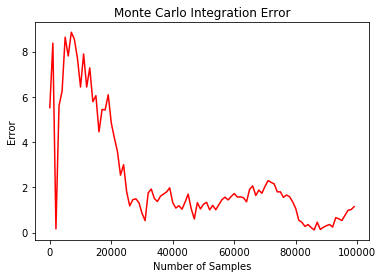

In [6]:
xpts=[x for x in range(1, n+1, 1000)]
plt.plot(xpts, err_list, 'r-')
plt.xlabel('Number of Samples')
plt.ylabel('Error')
plt.title('Monte Carlo Integration Error')
plt.show()